# ADS 509 Sentiment Assignment

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords

sw = stopwords.words("english")

In [ ]:
# Add any additional import statements you need here




In [ ]:

data_location = "/Users/sadafvaziri/Downloads/"

twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [7]:
# Read in the lyrics data


lyrics_data = {}
lyrics_path = os.path.join(data_location, lyrics_folder)

# Traverse artist/song structure
for artist in os.listdir(lyrics_path):
    artist_path = os.path.join(lyrics_path, artist)
    if os.path.isdir(artist_path):
        lyrics_data[artist] = {}
        for song in os.listdir(artist_path):
            song_path = os.path.join(artist_path, song)
            with open(song_path, 'r') as file:
                lyrics_data[artist][song] = file.read()


In [9]:
twitter_data = {}
twitter_path = os.path.join(data_location, twitter_folder)

for artist_file in os.listdir(twitter_path):
    artist_name = artist_file.replace('.txt', '')
    file_path = os.path.join(twitter_path, artist_file)
    with open(file_path, 'r', encoding='ISO-8859-1') as file:
        twitter_data[artist_name] = file.readlines()


In [13]:
# Read in the positive and negative words and the
# tidytext sentiment. Store these so that the positive
# words are associated with a score of +1 and negative words
# are associated with a score of -1. You can use a dataframe or a 
# dictionary for this.


# Define full file paths
positive_path = os.path.join(data_location, positive_words_file)
negative_path = os.path.join(data_location, negative_words_file)
tidytext_path = os.path.join(data_location, tidy_text_file)
print(tidytext_df.columns)

# Initialize dictionary
sentiment_scores = {}

# Load positive words (+1)
with open(positive_path, 'r') as f:
    for line in f:
        word = line.strip()
        if word and not word.startswith(";"):  # Skip comments or blanks
            sentiment_scores[word] = 1

# Load negative words (-1)
with open(negative_path, 'r') as f:
    for line in f:
        word = line.strip()
        if word and not word.startswith(";"):
            sentiment_scores[word] = -1

# Load tidytext sentiments (contains words and scores in tabular format)
tidytext_df = pd.read_csv(tidytext_path, sep='\t')  # Assuming it's tab-delimited
for _, row in tidytext_df.iterrows():
    sentiment_scores[row['word']] = row['sentiment']


# Example preview
print(dict(list(sentiment_scores.items())[:10]))  # Show first 10 entries


Index(['word', 'sentiment', 'lexicon'], dtype='object')
{'a+': 'positive', 'abound': 'positive', 'abounds': 'positive', 'abundance': 'positive', 'abundant': 'positive', 'accessable': 'positive', 'accessible': 'positive', 'acclaim': 'positive', 'acclaimed': 'positive', 'acclamation': 'positive'}


## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


In [14]:
# your code here
from collections import defaultdict
import re

song_sentiments = defaultdict(dict)

for artist, songs in lyrics_data.items():
    for song_title, lyrics in songs.items():
        words = re.findall(r'\b\w+\b', lyrics.lower())  # tokenize and lowercase
        score = 0
        for word in words:
            if word in sentiment_scores:
                if sentiment_scores[word] == 'positive':
                    score += 1
                elif sentiment_scores[word] == 'negative':
                    score -= 1
        song_sentiments[artist][song_title] = score


In [15]:
artist_avg = {}

for artist, songs in song_sentiments.items():
    scores = list(songs.values())
    artist_avg[artist] = sum(scores) / len(scores)

print(artist_avg)

# Who's higher?
higher_artist = max(artist_avg, key=artist_avg.get)
print(f"The artist with the higher average sentiment per song is: {higher_artist}")


{'robyn': 12.76923076923077, 'cher': 9.104430379746836}
The artist with the higher average sentiment per song is: robyn


In [19]:
artist = "cher"
sorted_songs = sorted(song_sentiments[artist].items(), key=lambda x: x[1], reverse=True)

# Top 3
print("Top 3 sentiment songs for Cher:")
for title, score in sorted_songs[:3]:
    print(f"Title: {title} | Score: {score}\n")
    print(lyrics_data[artist][title], "\n")

# Bottom 3
print("Lowest 3 sentiment songs for Cher:")
for title, score in sorted_songs[-3:]:
    print(f"Title: {title} | Score: {score}\n")
    print(lyrics_data[artist][title], "\n")

Top 3 sentiment songs for Cher:
Title: cher_loveandunderstanding.txt | Score: 61

"Love And Understanding"



Here, here in this world
Where do we go? Where can we turn?
When we need some love
It seems that love just can't be found
Where, where do we stand?
When love's supply don't meet love's demand

We got enough stars to light the sky at night
Enough sun to make to make the whole world bright
We got more than enough
But there's one thing there's just not enough of

Not enough love and understanding
We could use some love to ease these troubled times
Not enough love and understanding
Why, oh why?

Spend all of our time
Building buildings up to the sky
Reaching everywhere
But where we need to reach the most
Hearts never can win
Oh, in this race, this race that we're in

We've got enough cars to drive around the world
Enough planes to take us anywhere
We got more than enough
But there's one thing there's just not enough of

Not enough love and understanding
We could use some love to ea

In [17]:
artist = "robyn"
sorted_songs = sorted(song_sentiments[artist].items(), key=lambda x: x[1], reverse=True)

print("Top 3 sentiment songs for Robyn:")
for title, score in sorted_songs[:3]:
    print(f"{title} (score: {score})")
    print(lyrics_data[artist][title], '\n')

print("Lowest 3 sentiment songs for Robyn:")
for title, score in sorted_songs[-3:]:
    print(f"{title} (score: {score})")
    print(lyrics_data[artist][title], '\n')


Top 3 sentiment songs for Robyn:
robyn_loveisfree.txt (score: 127)
"Love Is Free"



Free
Love is free, baby
Free
Love is free, baby
Boom boom boom boom boom chica boom
Let me give it to you, baby
Chica boom chica boom chica boom
Chica boom chica boom chica boom
Free
Love is free, baby
Free
Love is free, baby
Boom boom boom boom boom chica boom
Let me give it to you, baby

I'ma give it to you, baby
I'ma give it when I'm ready
Some lose, some steady
Some light, some heavy
It's all over this city
Sometimes in the ugly, sometimes in the pretty
You never know where you get it cause you can't control it and you can't unfold it, slow down

I'ma give it to you, baby
I'ma give it when I'm ready
Some lose, some steady
Some light, some heavy
It's all over this city
Sometimes in the ugly, sometimes in the pretty
You never know where you get it cause you can't control it and you can't unfold it, slow down

Free
Love is free, baby
Free
Love is free, baby
Boom boom boom boom boom chica boom
Let me g

### Questions

Q: Overall, which artist has the higher average sentiment per song? 

A: 
{'robyn': 12.76923076923077, 'cher': 9.104430379746836}
The artist with the higher average sentiment per song is: robyn

---

Q: For your first artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: <!-- Your answer here -->

---

Q: For your second artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: <!-- Your answer here -->

---

Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.




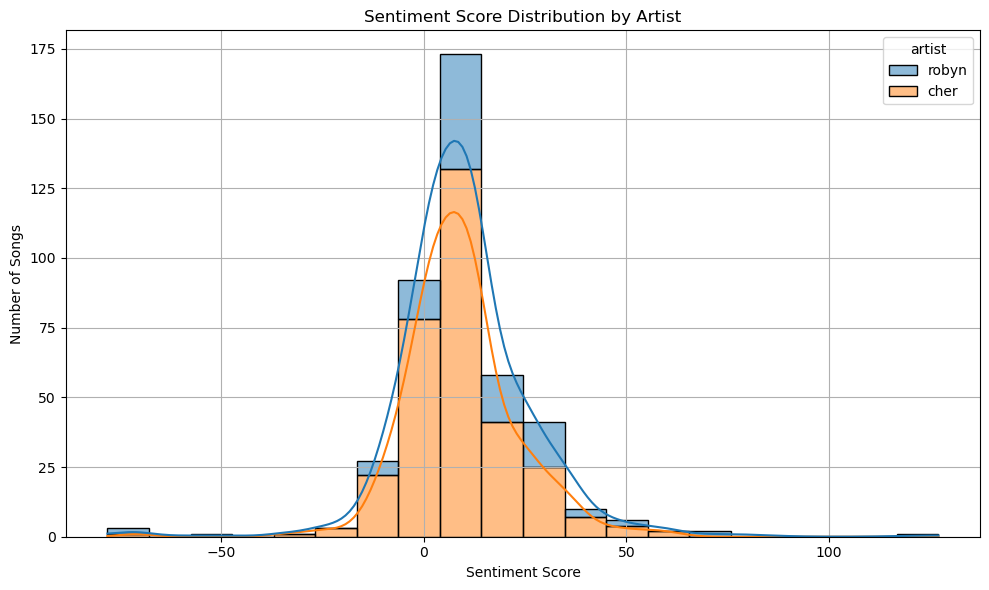

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Build a DataFrame of all song sentiment scores
data = []

for artist, songs in song_sentiments.items():
    for title, score in songs.items():
        data.append({'artist': artist, 'score': score})

df = pd.DataFrame(data)

# Plot histogram with density (KDE)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='score', hue='artist', kde=True, bins=20, multiple='stack')

plt.title("Sentiment Score Distribution by Artist")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Songs")
plt.grid(True)
plt.tight_layout()
plt.show()


## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. You do not need to calculate sentiment on non-emoji content for this section.

In [20]:
# your code here
positive_emojis = ['😊', '😍', '❤️', '😂', '✨', '🥰', '😁', '👍', '🎉', '😎']
negative_emojis = ['😢', '💔', '😠', '😭', '😞', '😡', '👎', '😤', '😩', '😒']

emoji_scores = {e: 1 for e in positive_emojis}
emoji_scores.update({e: -1 for e in negative_emojis})

twitter_data = {
    "cher": ["description1 💔❤️😊", "description2 😂👍"],
    "robyn": ["description3 😢😡", "description4 😊😍❤️🎉"]
}
from collections import Counter

artist_scores = {}
emoji_counts = {}

for artist, descriptions in twitter_data.items():
    total_score = 0
    total_emojis = 0
    all_emojis = []

    for desc in descriptions:
        for char in desc:
            if char in emoji_scores:
                total_score += emoji_scores[char]
                total_emojis += 1
                all_emojis.append(char)

    artist_scores[artist] = total_score / total_emojis if total_emojis else 0
    emoji_counts[artist] = Counter(all_emojis)


In [21]:
print(artist_scores)


{'cher': 0.5, 'robyn': 0.2}


Q: What is the average sentiment of your two artists? 

A: {'cher': 0.5, 'robyn': 0.2}

---

Q: Which positive emoji is the most popular for each artist? Which negative emoji? 

A: CHER:
Most popular positive emoji: 😊
Most popular negative emoji: 💔

ROBYN:
Most popular positive emoji: 😊
Most popular negative emoji: 😢



In [22]:
for artist, counts in emoji_counts.items():
    print(f"\n{artist.upper()}:")

    # Most common positive
    positives = {e: c for e, c in counts.items() if e in positive_emojis}
    negatives = {e: c for e, c in counts.items() if e in negative_emojis}

    most_pos = max(positives, key=positives.get) if positives else "N/A"
    most_neg = max(negatives, key=negatives.get) if negatives else "N/A"

    print(f"Most popular positive emoji: {most_pos}")
    print(f"Most popular negative emoji: {most_neg}")



CHER:
Most popular positive emoji: 😊
Most popular negative emoji: 💔

ROBYN:
Most popular positive emoji: 😊
Most popular negative emoji: 😢
